In [2]:
!pip install matplotlib seaborn

     ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
     -------------------------------------- 110.1/110.1 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/8.1 MB 17.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 16.0 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 17.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.1 MB 16.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.4/8.1 MB 16.6 MB/s eta 0:00:01
   ------------------------- -------------- 5.1/8.1 MB 16.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.7/8.1 MB 15.8 MB/s eta 0:00:01
   ------------------------------- -------- 6.4/8.1 MB 15.6 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 15.6 MB/s eta 0:00:01
   -------------------------------------- - 7.8/8.1 MB 15.5 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sanaj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
    --------------------------------------- 0.1/9.6 MB 4.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.6 MB 7.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.6 MB 9.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.6 MB 10.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/9.6 MB 10.6 MB/s eta 0:00:01
   ------------ --------------------------- 2.9/9.6 MB 10.9 MB/s eta 0:00:01
   -------------- ------------------------- 3.4/9.6 MB 10.8 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.6 MB 11.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.6 MB 10.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.6 MB 11.1 MB/s eta 0:00:01
   ----------------------- ---------------- 5.7/9.6 MB 11.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 11.5 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\sanaj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
df = pd.read_csv('../data/netflix_cleaned.csv')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

Count of Movies vs TV Shows

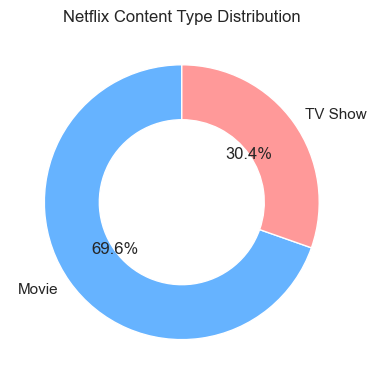

In [51]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        wedgeprops={'width': 0.4})

plt.title('Netflix Content Type Distribution')
plt.tight_layout()
plt.show()

Content Added Over Time

Decade

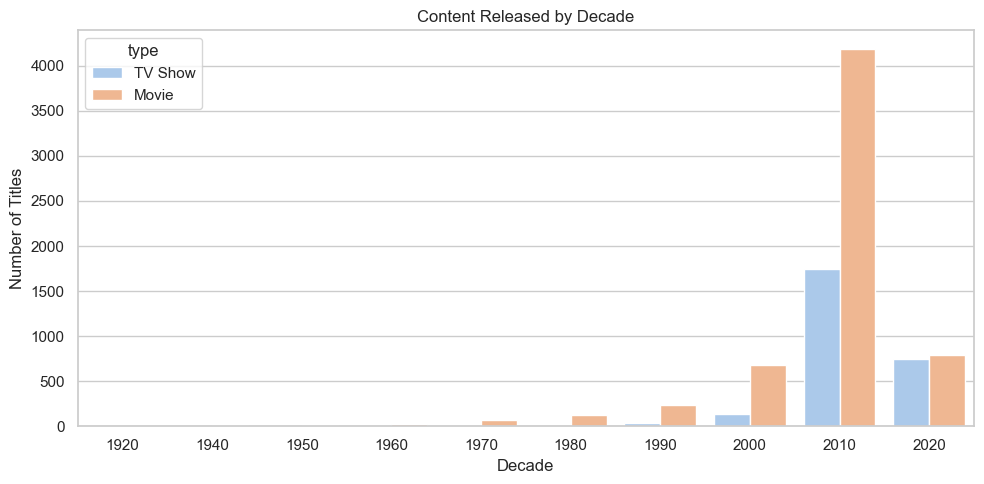

In [37]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='release_decade', hue='type', palette='pastel')
plt.title('Content Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

Yearly

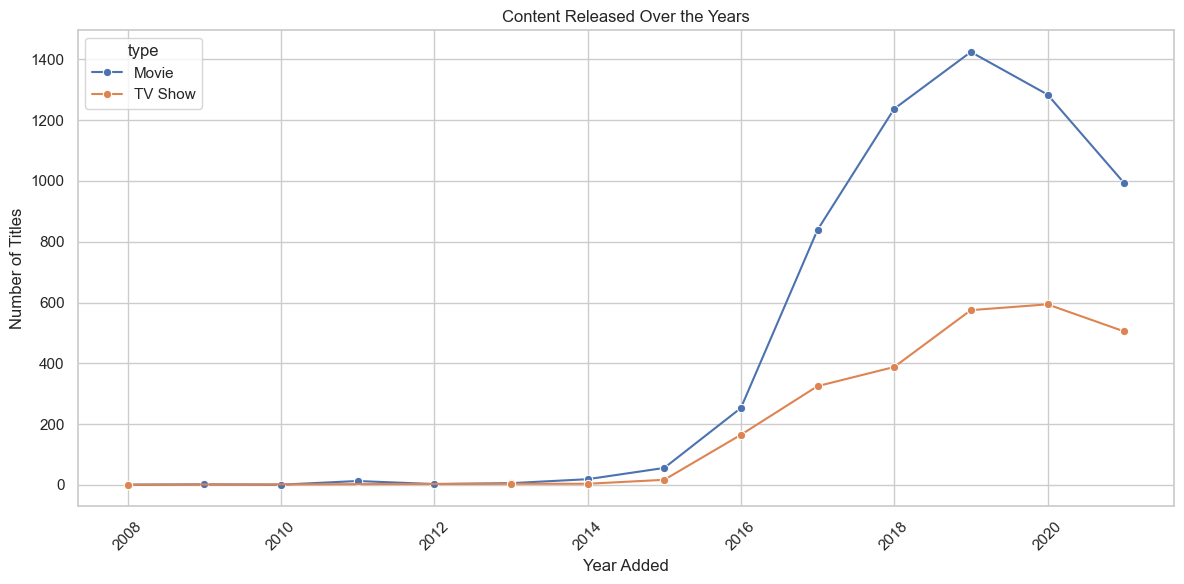

In [52]:
df_date=df.dropna(subset=['date_added']).copy()
df_date['year_added'] = pd.to_datetime(df_date['date_added']).dt.year

content_by_year = df_date.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=content_by_year, x='year_added', y='count', hue='type', marker='o')
plt.title('Content Released Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Monthly

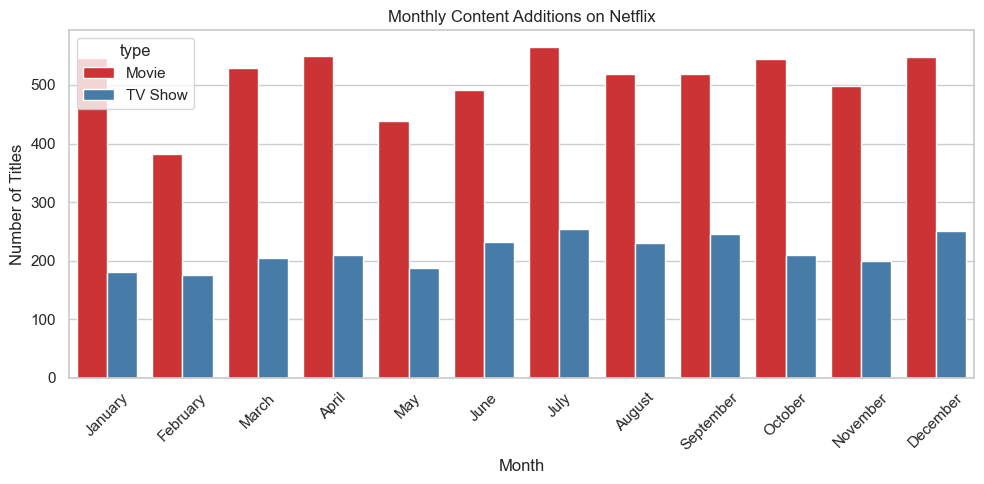

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='month_added', hue='type', palette='Set1', order=['January', 'February', 'March', 'April', 'May', 'June', 
                                      'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Content Additions on Netflix')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

Most Common Genres

In [11]:
from collections import Counter

genre_series = df['listed_in'].dropna()

all_genres = [genre.strip() for sublist in genre_series.str.split(',') for genre in sublist]

genre_counts = Counter(all_genres).most_common(15)

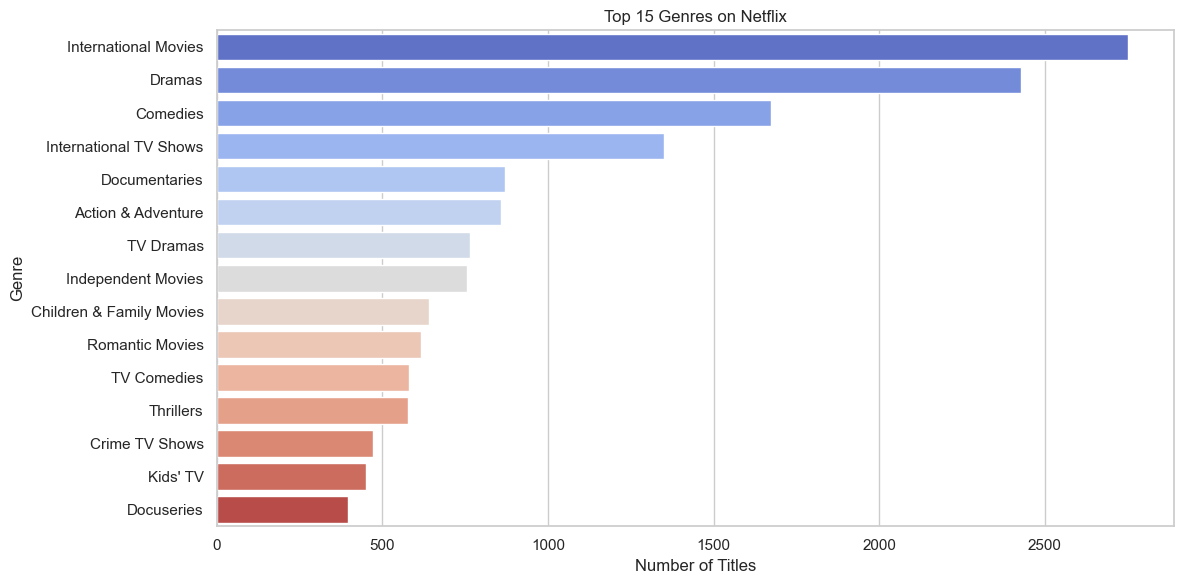

In [16]:
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x='Count', y='Genre',hue='Genre', palette='coolwarm')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Duration Distribution

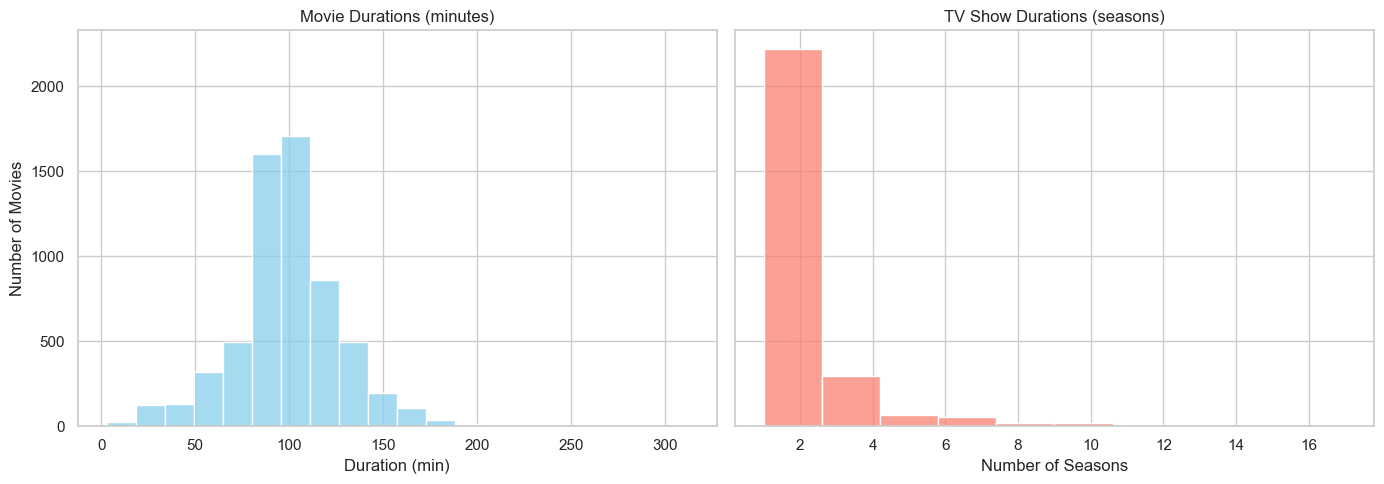

In [ ]:
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(data=movies, x='duration_int', bins=20, ax=axes[0], color='skyblue')
axes[0].set_title('Movie Durations (minutes)')
axes[0].set_xlabel('Duration (min)')
axes[0].set_ylabel('Number of Movies')

sns.histplot(data=shows, x='duration_int', bins=10, ax=axes[1], color='salmon')
axes[1].set_title('TV Show Durations (seasons)')
axes[1].set_xlabel('Number of Seasons')

plt.tight_layout()
plt.show()

Genre vs Retention

In [38]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['genres'] = movie_df['listed_in'].str.split(',')
movie_genres = movie_df.explode('genres')
movie_genres['genres'] = movie_genres['genres'].str.strip()
avg_duration_by_genre = movie_genres.groupby('genres')['duration_int'].mean().sort_values(ascending=False).head(10)

In [39]:
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['genres'] = tv_df['listed_in'].str.split(',')
tv_genres = tv_df.explode('genres')
tv_genres['genres'] = tv_genres['genres'].str.strip()
avg_seasons_by_genre = tv_genres.groupby('genres')['duration_int'].mean().sort_values(ascending=False).head(10)

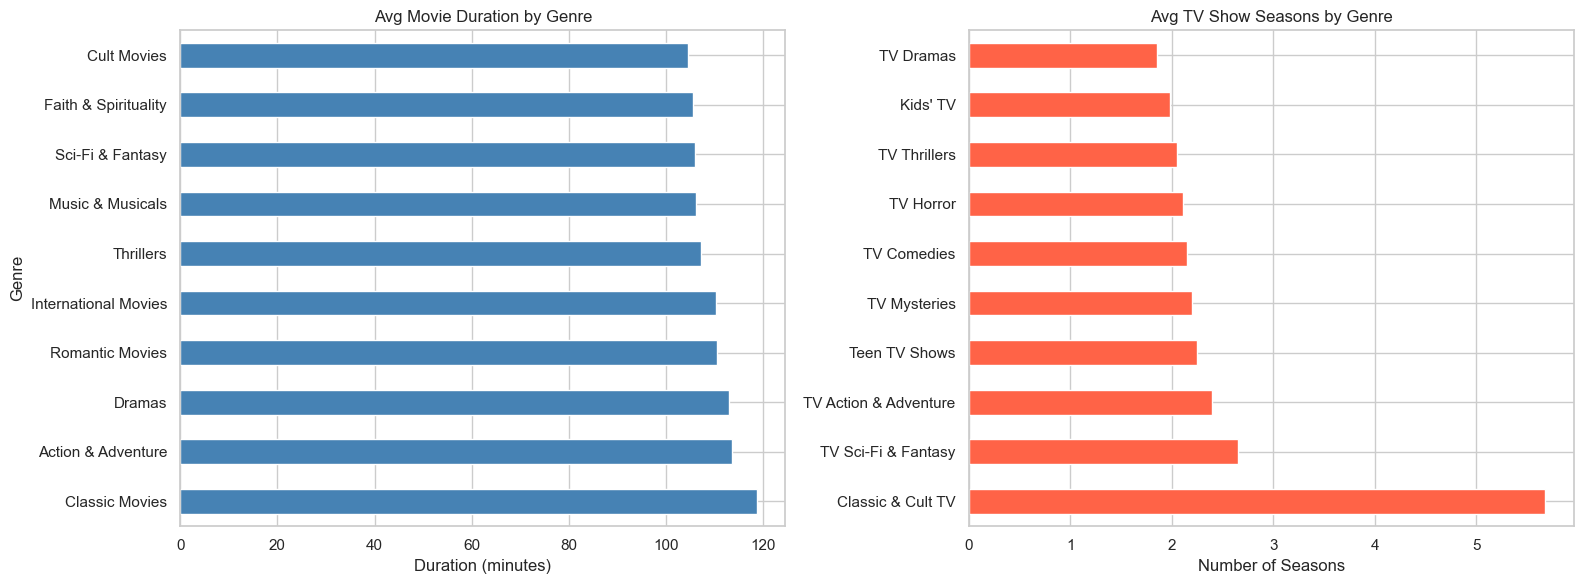

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

avg_duration_by_genre.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('Avg Movie Duration by Genre')
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Genre')

avg_seasons_by_genre.plot(kind='barh', ax=axes[1], color='tomato')
axes[1].set_title('Avg TV Show Seasons by Genre')
axes[1].set_xlabel('Number of Seasons')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Top Countries Producing Content

In [54]:
from collections import Counter

country_series = df['country'].dropna()
all_countries = [country.strip() for sublist in country_series.str.split(',') for country in sublist]

country_counts = Counter(all_countries).most_common(10)

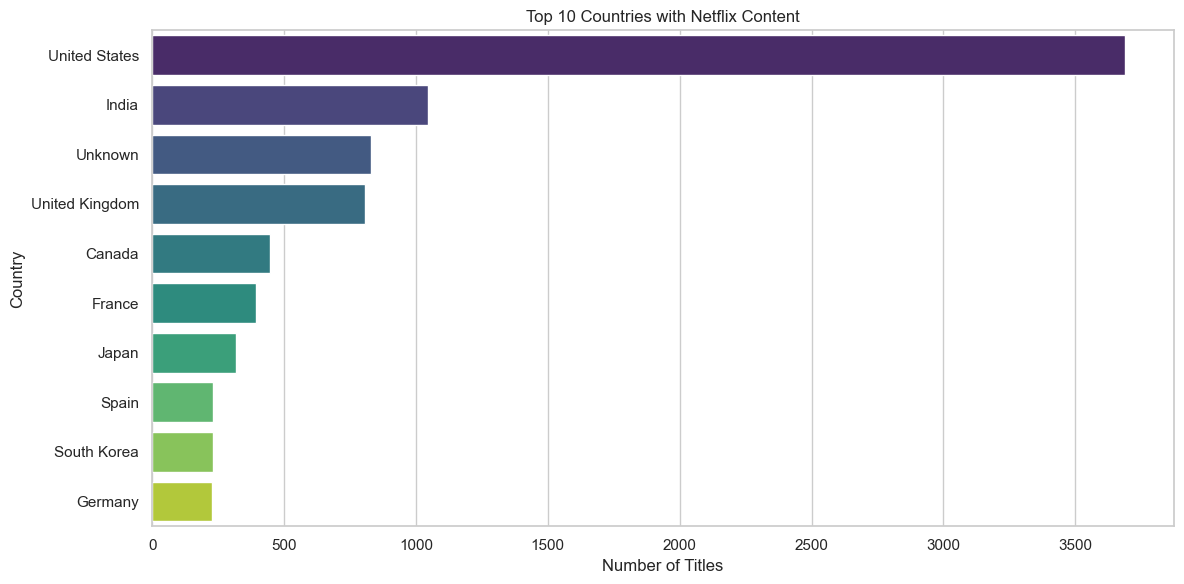

In [55]:
country_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=country_df, x='Count', y='Country', hue='Country', palette='viridis')
plt.title('Top 10 Countries with Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

using plotly

In [56]:
import pandas as pd
import plotly.express as px

country_data = df.dropna(subset=['country'])
country_data['country'] = country_data['country'].str.split(',')

country_exploded = country_data.explode('country')
country_exploded['country'] = country_exploded['country'].str.strip()

country_counts = country_exploded['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

In [61]:
import plotly.io as pio

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Blues',
    title='Netflix Titles by Country',
)

pio.write_html(fig, 'country_map.html', auto_open=True)